# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '/home/kazuhiro/Dropbox/MyPython/selfdrivingcar/tensorflow/data/train.p'
testing_file = '/home/kazuhiro/Dropbox/MyPython/selfdrivingcar/tensorflow/data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']



---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = 32

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Image Shape: {}".format(X_train[0].shape))
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Image Shape: (32, 32, 3)
Number of training examples = 39209
Number of testing examples = 12630
Image data shape = 32
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

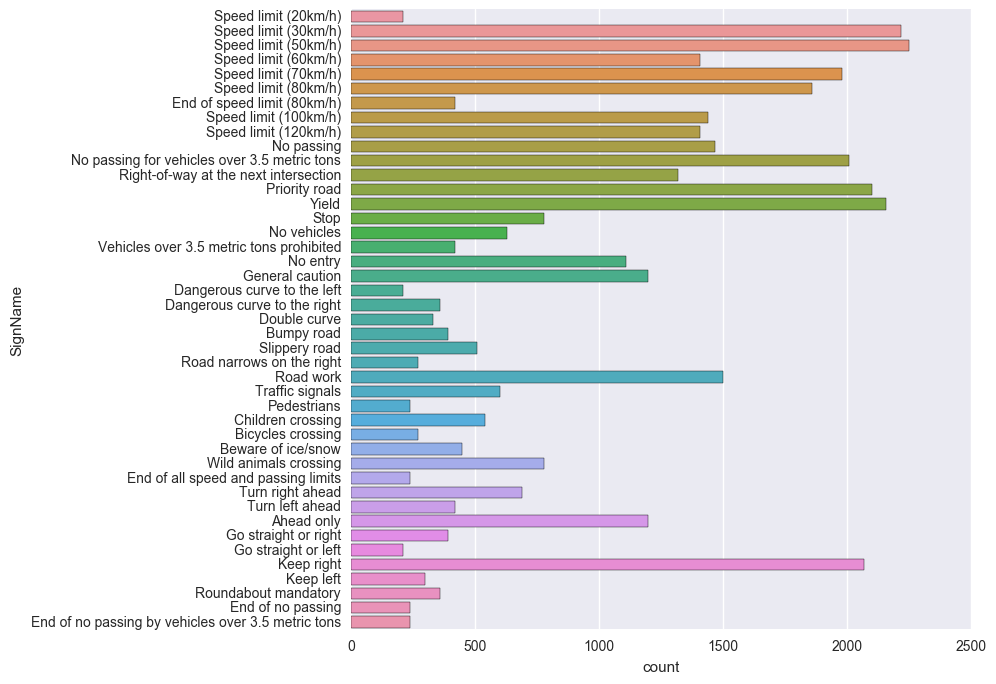

In [6]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

sign_df = pd.read_csv('signnames.csv')
class_df = pd.DataFrame({'ClassId':y_train})
res = pd.merge(sign_df, class_df, how='outer')
plt.figure(figsize=(8,8))
sns.countplot(y='SignName',data=res,orient='h')

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_



In [10]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.


def rgb2gray(rgb):
   r,g,b = rgb[:,:,:,0],rgb[:,:,:,1],rgb[:,:,:,2]
   gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
   gray_ex = gray[:, :, :, np.newaxis]
   return gray_ex.astype(np.float32)

X_train = rgb2gray(X_train)
X_test = rgb2gray(X_test)

**Answer:**
Shuffling of the order of data improves the speed of learning because the network learns the fastest from most unexpected data.

In [246]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
I converted color image to gray scale in order to fit it into Lenet architechture. Also the shuffling the training data every epoch is necessary for increasing accuracy. 

In [247]:
from sklearn.cross_validation import train_test_split
from sklearn.utils import shuffle

X_test, y_test = shuffle(X_test, y_test)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

print("Number of training examples =", n_train)
print("Number of testing examples =", len(X_test))
print("Number of validation examples =", len(X_val))

Number of training examples = 39209
Number of testing examples = 6315
Number of validation examples = 6315


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

** Data **
* I split test data into validation and test data by half. The validation set is used for model selection, the test set for final model.

** Technique **
* I chose ReLU as acttivate function because of two benefits.
   * It is efficient for learning.  
   * There is no vanishing gradient problem.


* I decided to use Convolutional Neural Networks are very effective in areas such as image recognition and classification so I decided to use this for traffic sign recognition problem. it is able to learn to classify local patterns such as shapes and object in an image on its own.


* I used Pooling layers because of two reasons.
    * decrease size of output
    * avoid overfitting


* I didn't use Dropout, but Dropout is a technique temporarily for dropping neurons from the network and reducing overfitting. 

** Final Architechture **
* Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
* Activation. ReLU
* Pooling. Input = 28x28x6. Output = 14x14x6.
* Layer 2: Convolutional. Output = 10x10x16.
* Activation. ReLU
* Pooling. Output = 5x5x16.
* Flatten. Input = 5x5x16. Output = 400.
* Layer 3: Fully Connected. Input = 400. Output = 120.
* Activation. ReLU
* Layer 4: Fully Connected. Input = 120. Output = 84.
* Activation. ReLU
* Layer 5: Fully Connected (Logits). Input = 84. Output = 43.

In [248]:
### Train your model here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    w1 = tf.Variable(tf.truncated_normal(shape=(5,5,1,6),mean=mu,stddev=sigma),name='w1')
    b1 = tf.Variable(tf.zeros(6),name='b1')
    conv1 = tf.nn.conv2d(x, w1, strides=[1,1,1,1], padding='VALID')
    conv1 = tf.nn.bias_add(conv1, b1)

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    # Layer 2: Convolutional. Output = 10x10x16.
    w2 = tf.Variable(tf.truncated_normal(shape=(5,5,6,16),mean=mu,stddev=sigma),name='w2')
    b2 = tf.Variable(tf.zeros(16),name='b2')
    conv2 = tf.nn.conv2d(conv1, w2, strides=[1,1,1,1], padding='VALID')
    conv2 = tf.nn.bias_add(conv2, b2)
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_w = tf.Variable(tf.truncated_normal(shape=(400,120),mean=mu,stddev=sigma),name='fc1_w')
    fc1_b = tf.Variable(tf.zeros(120),name='fc1_b')
    fc1 = tf.add(tf.matmul(fc0,fc1_w),fc1_b)
    
    # Activation.
    fc1 = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_w = tf.Variable(tf.truncated_normal(shape=(120,84), mean=mu, stddev=sigma),name='fc2_w')
    fc2_b = tf.Variable(tf.zeros(84),name='fc2_b')
    fc2 = tf.add(tf.matmul(fc1,fc2_w), fc2_b)
    
    
    # Activation.
    fc2 = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_w = tf.Variable(tf.truncated_normal(shape=(84,43), mean=mu, stddev=sigma),name='fc3_w')
    fc3_b = tf.Variable(tf.zeros(43),name='fc3_b')
    logits = tf.add(tf.matmul(fc2,fc3_w), fc3_b)
    
    return logits

In [249]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()


with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x.astype(np.float32), y: batch_y.astype(np.int32)})
            
        validation_accuracy = evaluate(X_val, y_val)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'traffic')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.647

EPOCH 2 ...
Validation Accuracy = 0.786

EPOCH 3 ...
Validation Accuracy = 0.845

EPOCH 4 ...
Validation Accuracy = 0.847

EPOCH 5 ...
Validation Accuracy = 0.857

EPOCH 6 ...
Validation Accuracy = 0.880

EPOCH 7 ...
Validation Accuracy = 0.873

EPOCH 8 ...
Validation Accuracy = 0.885

EPOCH 9 ...
Validation Accuracy = 0.877

EPOCH 10 ...
Validation Accuracy = 0.885

Model saved


In [294]:
with tf.Session() as sess:
    saver.restore(sess, 'traffic')

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.883


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

* Larger batch sizes result in faster progress in training, but don't always converge as fast. Smaller batch sizes train slower, but can converge faster. I set the batch size to 128 considering the size of training data. 

* The models improve with more epochs of training, to a point. I repeated training some time and thought 10 epochs are appropriate for increasing accuracy. 

* I selected Gradient Descent as optimizer because it guaranteeds convergence to a local minimum under simple conditions and it's easy to implement. 

** Prameters **
* Batch size : 128
* Epochs     :  10

** Hyperparameters ** 
* mean = 0
* stddev = 0.1

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

First I started with Lenet archtechture. I thought Lenet would be suitable for this problem because reading handwritten text and traffic signs are similar. I had to preprocess data set as they are fit into Lenet architechture. I converted the image to gray scale and data type. 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

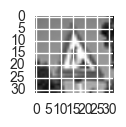

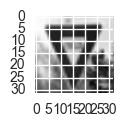

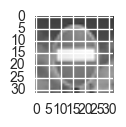

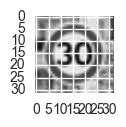

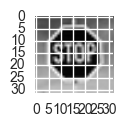

In [11]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

from scipy import misc

imgFiles = ['/home/kazuhiro/Dropbox/MyPython/selfdrivingcar/tensorflow/data/roadwork.png',
            '/home/kazuhiro/Dropbox/MyPython/selfdrivingcar/tensorflow/data/yield.png',
            '/home/kazuhiro/Dropbox/MyPython/selfdrivingcar/tensorflow/data/noentry.png',
            '/home/kazuhiro/Dropbox/MyPython/selfdrivingcar/tensorflow/data/speedlimit_30.png',
            '/home/kazuhiro/Dropbox/MyPython/selfdrivingcar/tensorflow/data/stop.png']


imgs = []
for i in range(len(imgFiles)):
   img = misc.imread(imgFiles[i])
   imgs.append(img)

color = np.array(imgs)
gray = rgb2gray(color)

for i in range(len(color)):
    plt.figure(figsize=(1,1))
    plt.imshow(gray[i].squeeze(),cmap='gray')

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
I chose "Roadwork:25", "Yield:13", "No Entry:17", "Speedlimit 30km: 1", and "Stop: 14". The signs needed to be very similar to the training data, otherwise the predictions didn't work well. I think all images are enough brightness and contrast, but the road work sign is somewhat complex sign so if the contrast is not good enough, it might make classification difficult.  

In [292]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

prediction = tf.argmax(logits, 1)

with tf.Session() as sess:
    saver.restore(sess, 'traffic')
    print(sess.run(prediction, feed_dict={x: gray.astype(np.float32)}))
    
    

[25 13 17  1 14]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
Yes. It's 100% accurate, but I chose the very nice photos from internet so that the predictions work well. The accuracy on the captured images is 100% while it was 88.3% on the testing set thus It seems the model is good fit. 


In [295]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

prob = tf.nn.top_k(logits, k=3)

with tf.Session() as sess:
    saver.restore(sess, 'traffic')
    print(sess.run(prob, feed_dict={x: gray.astype(np.float32)}))

TopKV2(values=array([[ 61.04610825,  20.42829323,  17.33292389],
       [ 71.41280365,  31.28590393,  29.77226257],
       [ 63.19551468,  31.75076103,  20.90447044],
       [ 89.19376373,  62.79321671,  56.15997314],
       [ 48.56686401,   8.48010731,   8.2426548 ]], dtype=float32), indices=array([[25, 31, 22],
       [13, 38, 30],
       [17, 14, 13],
       [ 1,  5,  0],
       [14, 38,  3]], dtype=int32))


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

~~~
TopKV2(values=array([[ 61.04610825,  20.42829323,  17.33292389],
       [ 71.41280365,  31.28590393,  29.77226257],
       [ 63.19551468,  31.75076103,  20.90447044],
       [ 89.19376373,  62.79321671,  56.15997314],
       [ 48.56686401,   8.48010731,   8.2426548 ]], dtype=float32), indices=array([[25, 31, 22],
       [13, 38, 30],
       [17, 14, 13],
       [ 1,  5,  0],
       [14, 38,  3]], dtype=int32))
~~~

From above result, I think if the first value in top 3 values is much bigger than the second value, the model is certain of that prediction. So for Roadwork:25", "Yield:13", "No Entry:17",and "Stop: 14", the it is very certain of the prediction, but for "Speedlimit 30km: 1", the model seems uncertain of prediction.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.